In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784")

In [3]:
x,y = mnist['data'],mnist['target']

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
%matplotlib inline

In [7]:
import matplotlib
import matplotlib.pyplot as plt

In [8]:
some_digit = x[36000]
some_digit_image = some_digit.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

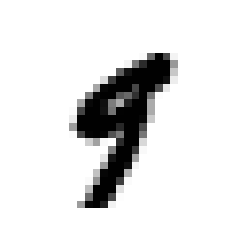

In [9]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [10]:
y[36000]

'9'

In [11]:
x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

In [12]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [13]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)

In [14]:
y_test_9

array([False, False, False, ..., False, False, False])

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(tol=0.1, solver='lbfgs')

In [23]:
clf.fit(x_train, y_train_9)

C:\Users\jayme\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

In [24]:
clf.predict([some_digit])

array([False])

In [25]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_9, cv=3, scoring='accuracy')

C:\Users\jayme\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\jayme\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\jayme\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [26]:
a.mean()

0.9592499999999999